Misurazioni di CO2
- https://gml.noaa.gov/aftp/data/trace_gases/co2/pfp/surface/co2_surface-pfp_1_ccgg_ASCIItext.zip
- https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv

crescita della popolazione
https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_General/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx

deforestazione
- https://ourworldindata.org/deforestation
- blob:https://ourworldindata.org/dd888c14-a03c-4337-8bce-80b500645beb
- blob:https://ourworldindata.org/93fbc00d-961c-48e5-aead-5e66b944adb8
- blob:https://ourworldindata.org/7606fe55-a2bf-4756-a1b4-2d0743bdbf74

STUDIO DI CORRELAZIONE TRA LA DEFORESTAZIONE LA CO2 E LA CRESCITA DELLA POPOLAZIONE

In [56]:
# importiamo le librerie necessarie per il nostro studio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configuriamo le impostazioni di visualizzazione
sns.set_style('whitegrid')
sns.set_palette('Set2')

# importiamo le librerie di sistema
import os
import sys
import csv



In [123]:
# creiamo il percorso di path 
path = sys.path[0] + '/'

# muoviamoci indietro di una cartella
dataset_path = os.path.abspath(os.path.join(path, os.pardir))

# creiamo il percorso della cartella di lavoro dei dataset
work_dir = dataset_path + '/dataset/defores/'


print(work_dir)
print(path)

/home/onizuka-host/Zoho WorkDrive (Catalano Consulenze Tecniche)/My Folders/Documenti personali_/Corsi/Scuola di Python con Jensen/Esercizi/jensen/Tillämpad AI, datautvinning, maskininlärning och deep learning/ML/Esercitazioni/dataset/defores/
/home/onizuka-host/Zoho WorkDrive (Catalano Consulenze Tecniche)/My Folders/Documenti personali_/Corsi/Scuola di Python con Jensen/Esercizi/jensen/Tillämpad AI, datautvinning, maskininlärning och deep learning/ML/Esercitazioni/defores/


COMINCIAMO CON CREARE UN UNICO DATASET CON LA MEDIA DEI VALORI DI CO2 DELLE VARIE STAZIONI DI MISURAZIONE
DIVISE PER ANNO

In [70]:
# crea una lista di file nella cartella di lavoro dei dataset
file_list = os.listdir(work_dir + 'txt/')
print(file_list)

# Creiamo una funzione per convertire i file txt in csv andando a prendere i dati a partire dalla riga dove 
# cominciano i dati veri e propri
def convert_txt_to_csv(file_name):
    # leggiamo il file txt
    with open(work_dir + 'txt/' + file_name, 'r') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split(",") for line in stripped if line)

        # creiamo una lista delle righe
        file = []
        for line in lines:
            file.append(line)
        
        # nella prima riga di ogni file txt è presente il numero della righe di heater
        header = int(file[0][0].split()[-1])

        # creiamo il file csv a partire dalla riga header -1 perchè la numerazione delle righe parte da 0
        with open(work_dir + 'csv/' + file_name.replace('.txt', '.csv'), 'w') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(file[header-1:])

# convertiamo tutti i file txt in csv
for i in file_list:
    convert_txt_to_csv(i)

# creiamo una lista dei file csv
csv_list = os.listdir(work_dir + 'csv/')

# creiamo una funzione per creare un dataframe con i dati di tutti i dataset
def create_df(file_list):
    # creiamo l'oggetto dataframe
    df = pd.DataFrame()

    # creiamo un ciclo for per leggere tutti i file csv e creare un dataframe con i dati
    for i in file_list:
        df_temp = pd.read_csv(work_dir + 'csv/' + i, sep=' ')
        # creiamo una colonna con il nome del dataset in modo poi da poterlo usare come chiave per il nome della colonna
        name_data = df_temp['site_code'].unique()[0]
        # ora estraiamo solo le colonne che ci interessano e cambiamo il nome della colonna value con il nome del dataset
        df_temp = df_temp[['year', 'value']].copy()
        df_temp = df_temp.rename(columns={'value': name_data})
        # raggruppiamo per anno e calcoliamo la media dei valori
        df_temp = df_temp.groupby('year').mean()
        # uniamo i dataframe
        df = pd.concat([df, df_temp], axis=1)
        # rinominiamo la colonna con la media dei valori
        df['CO2'] = df.mean(axis=1)
        # ordina le righe in ordine numerico crescente 
        df = df.sort_index()

    return df['CO2']

df = create_df(csv_list)
df.to_csv(work_dir + '/CO2.csv')

In [240]:
df1 = pd.read_csv(work_dir + '/co2_mm_mlo.csv')
df1 = df1[['year', 'average']]
df1.rename(columns={'average': 'CO2'}, inplace=True)
df1 = df1.groupby('year').mean()
df1.to_csv(work_dir + '/CO2_1.csv')


             CO2
year            
1958  315.292000
1959  315.977500
1960  316.907500
1961  317.640833
1962  318.448333
...          ...
2019  411.655000
2020  414.236667
2021  416.449167
2022  418.567500
2023  420.086667

[66 rows x 1 columns]


ORA ANALIZIAMO IL DATASET DELL'ANDAMENTO DELLA CRESCITA DELLA POPOLAZIONE

In [126]:
# creiamo una lista di file nella cartella di lavoro dei dataset
dataset_list = os.listdir(work_dir)

In [150]:
pop_list = []
for i in dataset_list:
    #print(i)
    if 'WPP' in i: 
        pop_list.append(i)

df = pd.read_csv(work_dir + pop_list[0], encoding='latin-1')

# estraiamo l'elenco delle colonne che ci interessano
col = [
    'Year',
    'Total Population, as of 1 July (thousands)', 
    'Population Density, as of 1 July (persons per square km)'    
    ]

# creiamo un dataframe con i dati che ci interessano
df = df[col].copy()

# rinominiamo le colonne
df.rename(columns={
    'Year': 'year', 
    'Total Population, as of 1 July (thousands)': 'pop', 
    'Population Density, as of 1 July (persons per square km)': 'pop_density'}, 
    inplace=True)

# creiamo la colonna della superficie occupata dalla popolazione

# convertiamo la colonna pop e pop_density in float
df['pop'] = df['pop'].str.replace(' ', '').astype(float)
df['pop_density'] = df['pop_density'].str.replace(',', '.').astype(float)
df['pop_area'] = round(df['pop'] / df['pop_density'], 2)

df.to_csv(work_dir + '/pop.csv')


ORA ANALIZZIAMO I DATASET DELLA DEFORESTAZIONE

In [ ]:
forset_list = []
for i in dataset_list:
    #print(i)
    if 'area' in i: 
        forset_list.append(i)

In [196]:
# analiziamo il secondo dataset che contiene i dati della foresta
df2 = pd.read_csv(work_dir + '/' + forset_list[1], encoding='latin-1')
df2 = df2[df2['Entity'] == 'World']
df2.drop(columns=['Code', 'Entity'], inplace=True)
df2.rename(columns={'Year': 'year', 'Forest cover': 'forest_area_%'}, inplace=True)
df2.to_csv(work_dir + '/forest_area.csv')
print(df2.head())

      year  forest_area_%
7850  1990      32.518625
7851  1991      32.458458
7852  1992      32.398291
7853  1993      32.338124
7854  1994      32.277957


ORA UNIAMO I DATASET DELLA CRESCITA DELLA POPOLAZIONE E DELLA DEFORESTAZIONE E DELLA co2 E CERCHIAMO DI TROVARE UNA CORRELAZIONE

In [237]:
df1 = pd.read_csv(work_dir + '/CO2_1.csv').set_index('year')
df1

,Unnamed: 0,CO2
year,,
1958,0,314.43
1958,1,315.16
1958,2,314.71
1958,3,315.14
1958,4,315.18
...,...,...
2023,779,419.37
2023,780,419.53
2023,781,420.67


In [243]:
# creiamo un dataframe con i dati che ci interessano
#df1 = pd.read_csv(work_dir + '/CO2.csv').set_index('year')
df1 = pd.read_csv(work_dir + '/CO2_1.csv').set_index('year')
df2 = pd.read_csv(work_dir + '/pop.csv').drop(columns=['Unnamed: 0']).set_index('year')
df3 = pd.read_csv(work_dir + '/forest_area.csv').drop(columns=['Unnamed: 0']).set_index('year')

# uniamo i dataframe
df = pd.concat([df1, df2, df3], axis=1).sort_index()
df.drop(columns=['pop_density', 'pop_area'], inplace=True)

# eliminiamo l'ultima riga che contiene i dati del 2021
df = df[:-3]

df.to_csv(work_dir + '/CO2_pop_forest.csv')

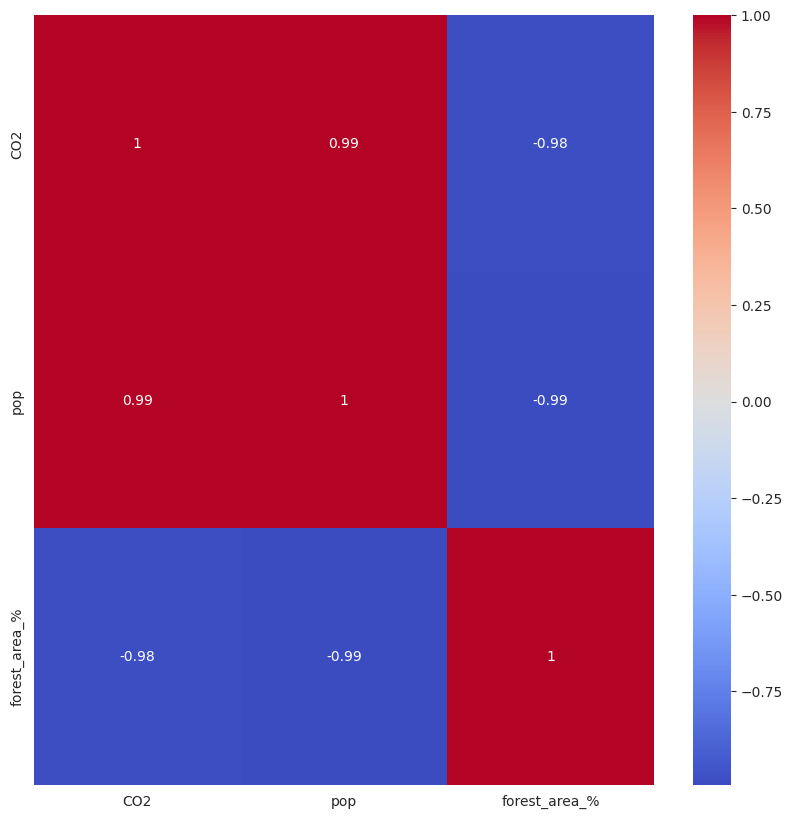

In [244]:
# calcoliamo la correlazione tra le varie colonne
corr = df.corr()

# creiamo una heatmap per visualizzare la correlazione
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


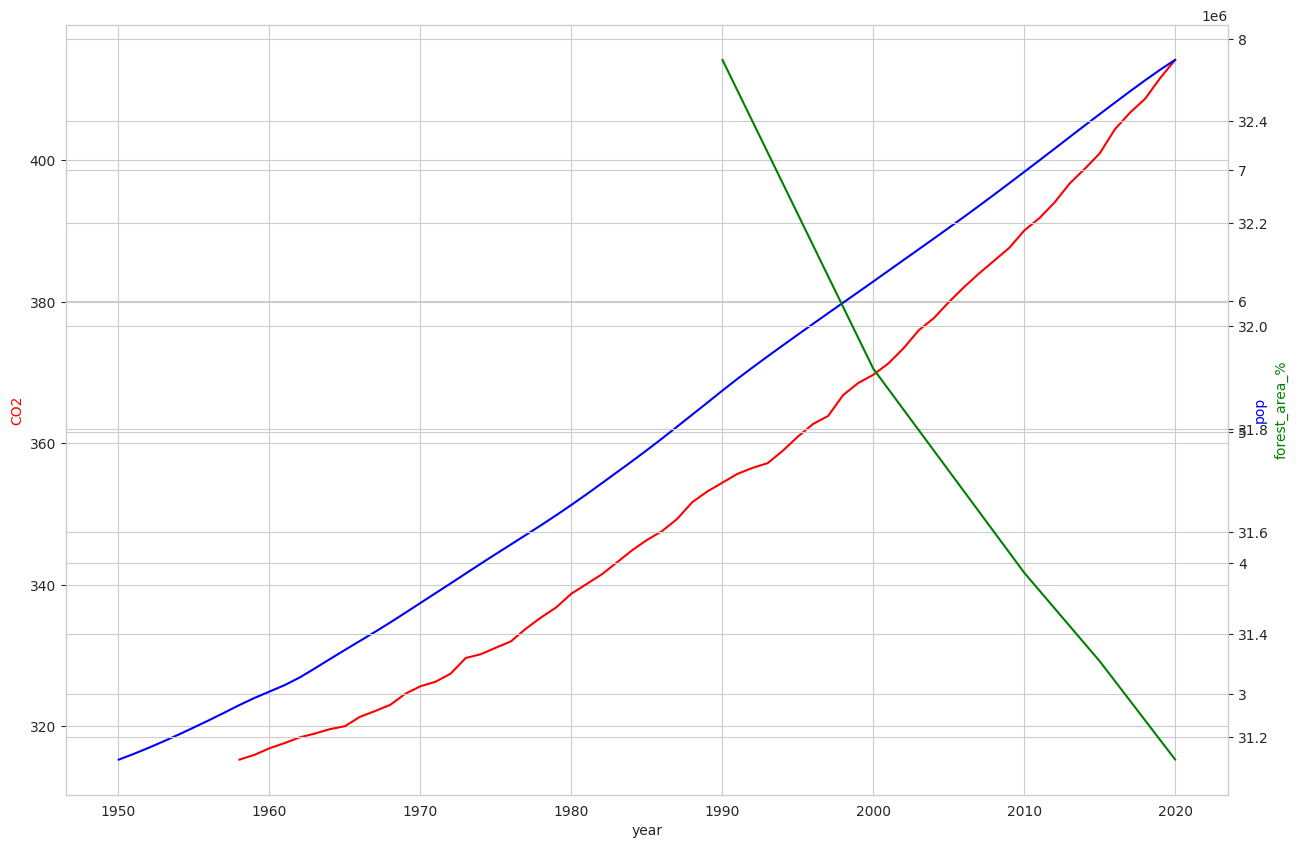

In [245]:
# visualiziamo su un grafico con assi separati i dati relativi alla CO2 e alla popolazione e alla deforestazione
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax1.plot(df.index, df['CO2'], color='red', label='CO2')
ax2.plot(df.index, df['pop'], color='blue', label='pop')
ax3.plot(df.index, df['forest_area_%'], color='green', label='forest_area_%')

ax1.set_xlabel('year')
ax1.set_ylabel('CO2', color='red')
ax2.set_ylabel('pop', color='blue')
ax3.set_ylabel('forest_area_%', color='green')

plt.show()

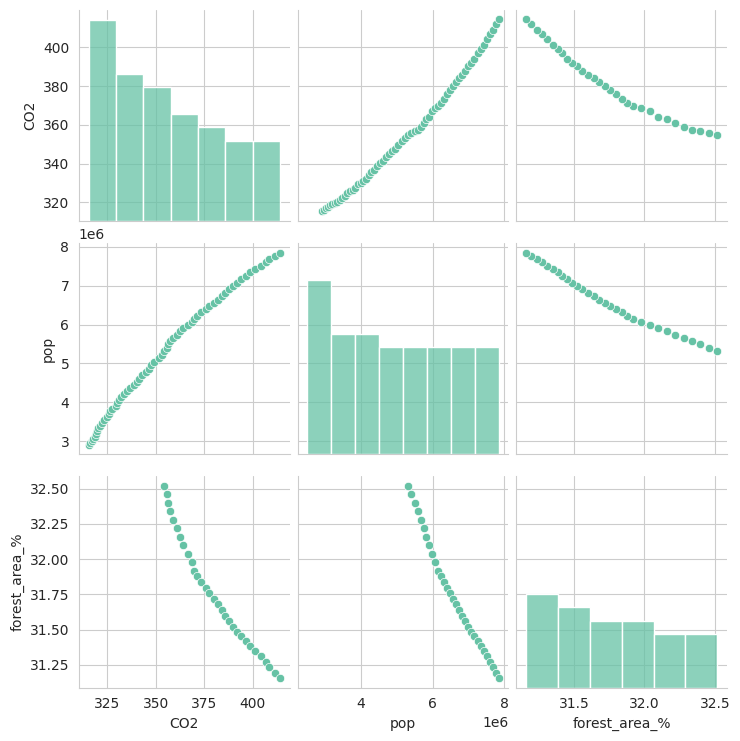

In [246]:
# vediamo le pairplot tra le varie colonne
sns.pairplot(df)
plt.show()

In [206]:
print(df.tail())

             CO2        pop  pop_density   pop_area  forest_area_%
year                                                              
2016  408.253626  7513474.0         57.6  130442.26      31.309281
2017  412.274888  7599822.0         58.3  130357.15      31.270999
2018  412.090952  7683790.0         58.9  130454.84      31.232716
2019  412.714989  7764951.0         59.5  130503.38      31.194434
2020  418.676872  7840953.0         60.1  130465.11      31.156151


In [248]:
# facciamo una regressione lineare multipla per calcolare il valore della CO2 in base alla popolazione e alla deforestazione
from sklearn.linear_model import LinearRegression

# creiamo un oggetto LinearRegression
lr = LinearRegression()

# eliminiamo le righe con valori nulli
df.dropna(inplace=True)

# creiamo le variabili indipendenti e dipendenti
X = df[['pop', 'forest_area_%']]
y = df['CO2']

# scaliamo i dati
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# suddividiamo il dataset in train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# addestriamo il modello
lr.fit(X_train, y_train)

# facciamo le previsioni
y_pred = lr.predict(X_test)

# valutiamo il modello
from sklearn.metrics import mean_squared_error, r2_score

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))




Mean squared error: 0.01
Coefficient of determination: 0.92


 - Calcolare l'andamento della riduzione di foreste con una regressione polinomiale
 - aggiungere i dati mancanti della deforestazione al dataset della deforestazione 
 - rimettere in grafico la deforestazione con i dati mancanti aggiunti